In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


Import CSV dataset

In [43]:
dataset = pd.read_csv("..\\data\\housing_ext.csv")

# Exploring the dataset
The features can be summarized as follows:
CRIM: This is the per capita crime rate by town
ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
INDUS: This is the proportion of non-retail business acres per town.
CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
NOX: This is the nitric oxides concentration (parts per 10 million)
RM: This is the average number of rooms per dwelling
AGE: This is the proportion of owner-occupied units built prior to 1940
DIS: This is the weighted distances to five Boston employment centers
RAD: This is the index of accessibility to radial highways
TAX: This is the full-value property-tax rate per $10,000
PTRATIO: This is the pupil-teacher ratio by town
B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
LSTAT: This is the percentage lower status of the population
MEDV: This is the median value of owner-occupied homes in $1000s

In [4]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326718,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



Plot some of the Data

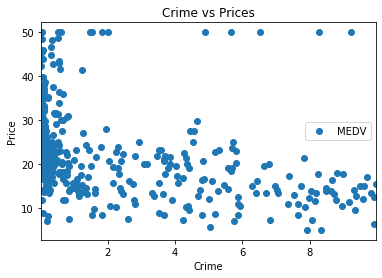

In [5]:
dataset.plot(x='CRIM', y='MEDV', style='o')
plt.title('Crime vs Prices')
plt.xlabel('Crime')
plt.ylabel('Price')
plt.show()

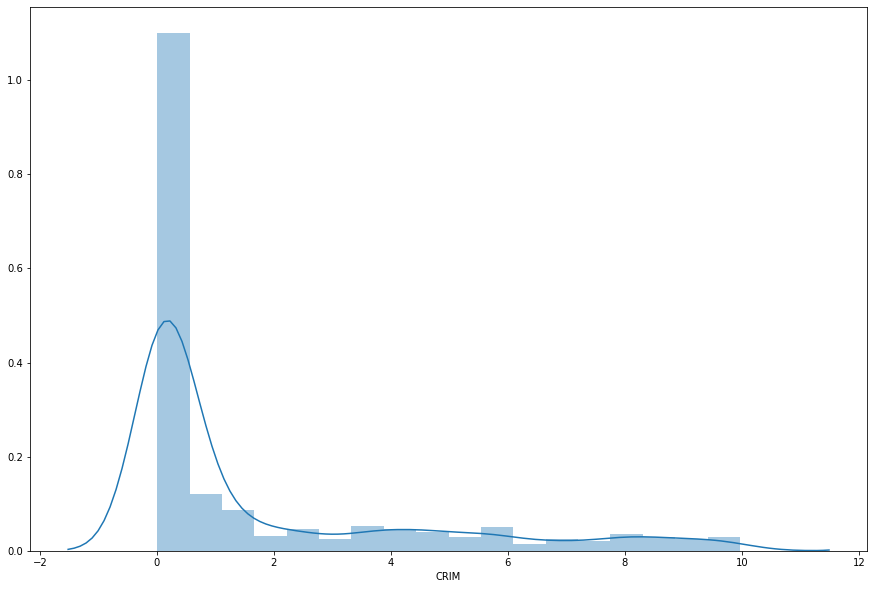

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['CRIM'])


# Linear Regression
First we train a linear regression model to predict Price of house based on per capita crime rate

Our next step is to divide the data into “attributes” and “labels”.

In [7]:
X = dataset['CRIM'].values.reshape(-1,1)
y = dataset['MEDV'].values.reshape(-1,1)

Next, we split 80% of the data to the training set while 20% of the data to test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


Finally we train our linear regression algorithm
First we import and instantiate LinearRegression class

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We find out the slope and intercept of our trained algorithm

In [10]:
print(regressor.intercept_)
print(regressor.coef_)

[24.9662643]
[[-1.36402213]]



Now we make some predictions

In [11]:
y_pred = regressor.predict(X_test)

Now compare the actual output values for X_test with the predicted values

In [12]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,27.5,18.751957
1,21.6,24.598824
2,17.7,19.928781
3,24.3,23.134601
4,22.2,24.896931
...,...,...
97,36.1,24.891038
98,14.2,15.387296
99,18.3,24.600188
100,23.5,24.917378


We can also visualize comparison result as a bar graph using the below script 

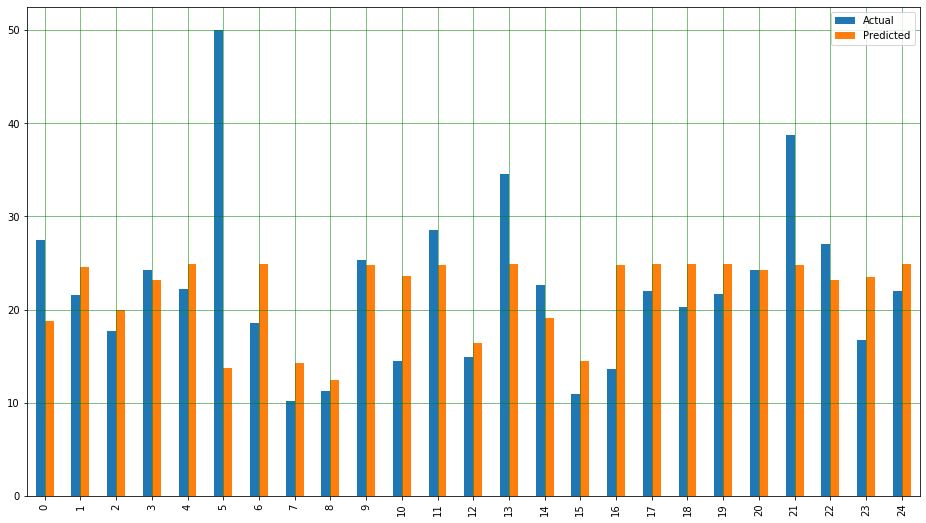

In [13]:
df.head(25).plot(kind='bar', figsize=(16,9))
plt.grid(which='major', linestyle='-', linewidth='.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='.5', color='black')
plt.show()

Let's plot our straight line with the test data :

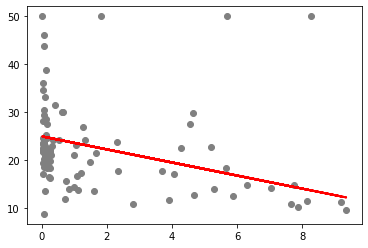

In [14]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred,color='red', linewidth=2)
plt.show()

The final step is to evaluate the performance of the algorithm.
This step is particularly important to compare how well 
different algorithms perform on a particular dataset.
For regression algorithms, three evaluation metrics are commonly used

1.)Mean Absolute Error
2.)Mean Squared Error
3.)Root Mean Squared Error

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.977422486468945
Mean Squared Error: 75.70047123507385
Root Mean Squared Error: 8.700601774306985


In [16]:
#mean value of prices
print("Mean value of house prices", np.mean(y))
print("Median value of house prices", np.median(y))

Mean value of house prices 22.532806324110677
Median value of house prices 21.2


As we can see Root Mean Squared Error is 9.35 which is about 40% of Mean of the dependent Variable
Meaning our model is not accurate




# Multiple Linear Regression
 Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression
 The steps to perform multiple linear regression are almost similar to that of simple linear regression.
 
 Let us clean our data little bit, So first check which are the columns the contains NaN values in it

In [17]:
dataset.isnull().any()
#Once the above code is executed, all the columns should give False, In case for any column you find True result, then 
# remove all the null values from that column using below code
#dataset = dataset.fillna(method='ffill')

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

Our next step is to divide the data into “attributes” and “labels”.

In [18]:
#X = dataset[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV'].values
print("Boston housing dataset has {} data points with {} variables each.".format(*dataset.shape))

Boston housing dataset has 506 data points with 14 variables each.


Lets see some distributions

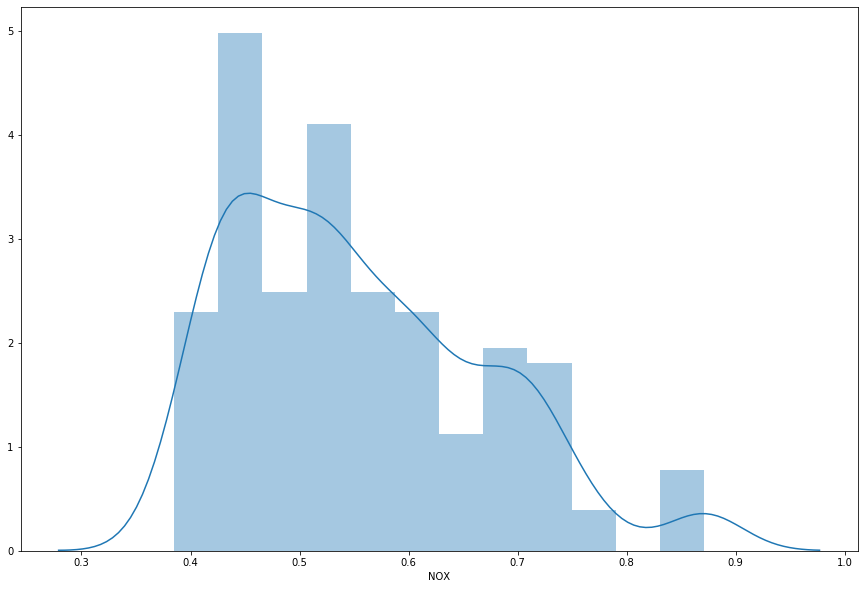

In [19]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['NOX'])


Now we split data inti traaining and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now let's Train our Model

In [21]:
m_regressor = LinearRegression()
m_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

in the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all 
the attributes. To see what coefficients our regression model has chosen, execute the following script

In [22]:
coeff_df = pd.DataFrame(m_regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.307943
ZN,0.042308
INDUS,0.018916
CHAS,2.476545
NOX,-14.359647
RM,3.751351
AGE,-0.000445
DIS,-1.294458
RAD,0.248268
TAX,-0.010794


Now lets do predictions on our test dataset

In [23]:
y_pred = m_regressor.predict(X_test)

Check the difference between the actual value and predicted value.

In [24]:
m_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
m_df1 = m_df.head(30)
m_df1

,Actual,Predicted
0,22.6,24.882042
1,50.0,22.415103
2,23.0,29.696396
3,8.3,13.845242
4,21.2,21.461861
5,19.9,19.364591
6,20.6,19.923117
7,18.7,21.466239
8,16.1,18.213598
9,18.6,19.902149


lets plot the comparison

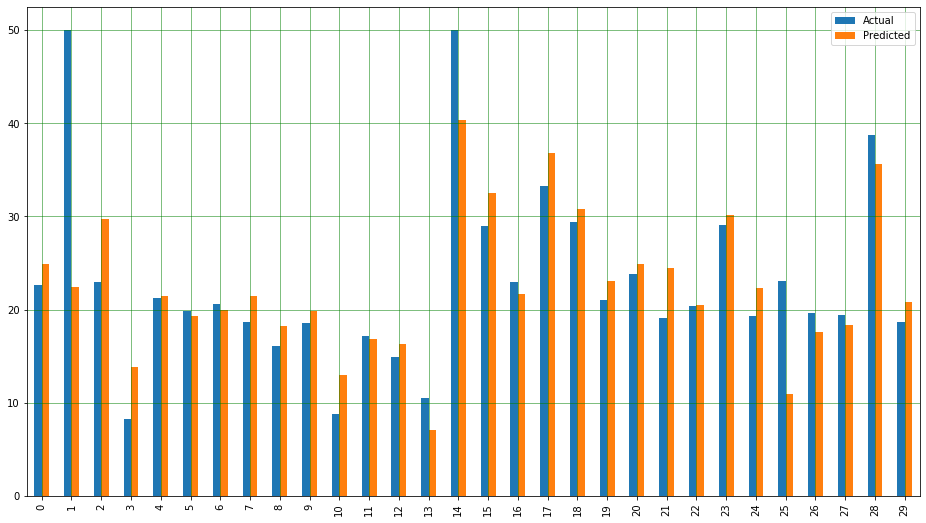

In [25]:
m_df1.plot(kind='bar',figsize=(16,9))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From the graph we can see that our predictions are good enough but has several outliers
We Calculate MAE, MSE, RMSE

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.8566274452600546
Mean Squared Error: 34.79096495811129
Root Mean Squared Error: 5.898386640269633


In [27]:
#mean value of prices
print("Mean value of house prices", np.mean(y))
print("Median value of house prices", np.median(y))

Mean value of house prices 22.532806324110677
Median value of house prices 21.2


As we can see RMSE is about 20% of the mean of dependent variable
This means that our algorithm was not very accurate but can still make reasonably good predictions.


# Selecting Features
As we can see in using crime to train and predict house prices
our error was very large, 
And we see from thee graph that an exponential function would better suffice

In [28]:
crime = dataset['CRIM'].values
crime

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [29]:
crime_i = pd.DataFrame(map(lambda x: 1/x, crime))

In [30]:
crime_i

,0
0,158.227848
1,36.616624
2,36.643459
3,30.892802
4,14.482259
...,...
501,15.966789
502,22.089684
503,16.458196
504,9.124920


In [31]:
crime = pd.DataFrame(crime)
type(crime)

pandas.core.frame.DataFrame

In [32]:
X = pd.concat([crime, crime_i], ignore_index=True, axis=1)
X

,0,1
0,0.00632,158.227848
1,0.02731,36.616624
2,0.02729,36.643459
3,0.03237,30.892802
4,0.06905,14.482259
...,...,...
501,0.06263,15.966789
502,0.04527,22.089684
503,0.06076,16.458196
504,0.10959,9.124920


In [33]:
X_train, X_test, y_train, y_test = train_test_split(crime_i, y, test_size=0.2, random_state=50)

In [34]:
p_regressor = LinearRegression(normalize=True)
p_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [35]:
p_regressor.coef_

array([0.16367523])

In [36]:
y_pred = p_regressor.predict(X_test)
y_pred

array([20.9154441 , 21.48711764, 20.92383695, 21.00140523, 24.09956952,
       20.8993159 , 23.13897708, 20.90032396, 20.89733379, 22.03623324,
       21.04510899, 22.14517844, 20.90554736, 25.22334019, 20.91792748,
       20.9008801 , 22.42742051, 25.50703342, 23.16388947, 22.87580065,
       21.18431345, 22.23410883, 21.00804584, 21.03003767, 23.70686672,
       20.90063118, 20.93792533, 22.47014202, 23.7713063 , 21.41886352,
       20.97831977, 21.02722586, 20.90838486, 22.87872668, 21.63312174,
       24.19815585, 21.12877581, 22.12732778, 23.89657271, 20.96877401,
       23.55002244, 21.65434852, 22.541364  , 24.46888684, 22.80737682,
       20.98100175, 24.03439885, 22.44294537, 20.95066864, 21.81769983,
       23.33562869, 26.87275204, 21.51110277, 20.91098317, 22.02964945,
       22.27285426, 21.27642176, 21.98052167, 21.55858365, 20.90739148,
       20.92134217, 22.20708073, 22.41507679, 22.75932981, 21.36115641,
       21.5950067 , 21.09767588, 21.01507569, 20.9147404 , 21.03

In [37]:
p_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
p_df1 = m_df.head(25)
p_df1

,Actual,Predicted
0,22.6,24.882042
1,50.0,22.415103
2,23.0,29.696396
3,8.3,13.845242
4,21.2,21.461861
5,19.9,19.364591
6,20.6,19.923117
7,18.7,21.466239
8,16.1,18.213598
9,18.6,19.902149


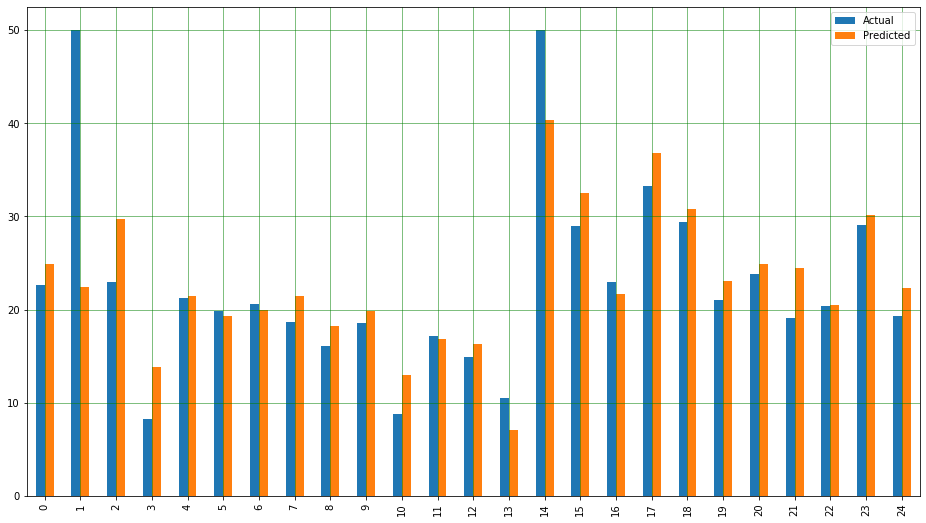

In [38]:
p_df1.plot(kind='bar',figsize=(16,9))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.855953095208589
Mean Squared Error: 70.88178991916595
Root Mean Squared Error: 8.41913237330106


As we can see RMSE decreased from 8.700 to 8.419 thus we improved our por model by schoosing appropriate feature value

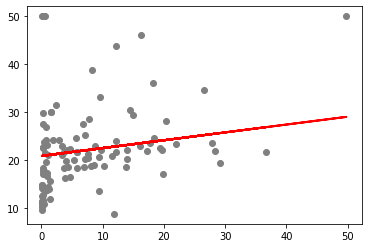

In [40]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred,color='red', linewidth=2)
plt.show()